In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

In [63]:
# Set up plotting styles
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### LOAD DATA

In [64]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### TRAINING DATA INITIAL INSPECTION

In [65]:
print(f"\n Dataset Shape: {train.shape}")
print(f"   - Rows: {train.shape[0]}")
print(f"   - Columns: {train.shape[1]}")


 Dataset Shape: (15289, 18)
   - Rows: 15289
   - Columns: 18


In [66]:
print(f"\n Data Types:")
print(train.dtypes.value_counts())

print(f"\n Column Names:")
print(train.columns.tolist())



 Data Types:
float64    17
int64       1
Name: count, dtype: int64

 Column Names:
['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield']


In [67]:
print(f"\n First 5 rows:")
print(train.head())

print(f"\n Data Info:")
train.info()


 First 5 rows:
   id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  

In [68]:
print(f"\n Basic Statistics:")
print(train.describe())


 Basic Statistics:


                 id     clonesize      honeybee       bumbles       andrena  \
count  15289.000000  15289.000000  15289.000000  15289.000000  15289.000000   
mean    7644.000000     19.704690      0.389314      0.286768      0.492675   
std     4413.698468      6.595211      0.361643      0.059917      0.148115   
min        0.000000     10.000000      0.000000      0.000000      0.000000   
25%     3822.000000     12.500000      0.250000      0.250000      0.380000   
50%     7644.000000     25.000000      0.500000      0.250000      0.500000   
75%    11466.000000     25.000000      0.500000      0.380000      0.630000   
max    15288.000000     40.000000     18.430000      0.585000      0.750000   

              osmia  MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count  15289.000000      15289.000000      15289.000000          15289.000000   
mean       0.592355         82.169887         49.673281             68.656256   
std        0.139489          9.146703        

In [69]:
print(f"Dataset shape: {test.shape}")

Dataset shape: (10194, 17)


###  TEST DATA INITIAL INSPECTION

In [70]:
print(f"\nDataset Shape: {test.shape}")
print(f"  - Rows: {test.shape[0]}")
print(f"  - Columns: {test.shape[1]}")


Dataset Shape: (10194, 17)
  - Rows: 10194
  - Columns: 17


In [71]:
print(f"\n Data Types:")
print(test.dtypes.value_counts())

print(f"\n Column Names:")
print(test.columns.tolist())


 Data Types:
float64    16
int64       1
Name: count, dtype: int64

 Column Names:
['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']


In [72]:
print(f"\nFirst 5 rows:")
print(test.head())



First 5 rows:
      id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0  15289       25.0      0.25     0.25     0.25   0.25              86.0   
1  15290       12.5      0.25     0.25     0.75   0.63              94.6   
2  15291       12.5      0.25     0.25     0.63   0.63              86.0   
3  15292       25.0      0.50     0.38     0.38   0.63              86.0   
4  15293       37.5      0.75     0.25     0.25   0.25              94.6   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              52.0                  71.9              62.0              30.0   
1              57.2                  79.0              68.2              33.0   
2              52.0                  71.9              62.0              30.0   
3              52.0                  71.9              62.0              30.0   
4              57.2                  79.0              68.2              33.0   

   AverageOfLowerTRange  RainingDays  Ave

In [73]:
print(f"\nBasic Statistics:")
print(test.describe())
#gives count, mean, std, min, 25%, 50%, 75%, max for numerical columns


Basic Statistics:
                 id     clonesize      honeybee       bumbles       andrena  \
count  10194.000000  10194.000000  10194.000000  10194.000000  10194.000000   
mean   20385.500000     19.795958      0.391606      0.286307      0.491328   
std     2942.898656      6.591864      0.390022      0.059867      0.148166   
min    15289.000000     10.000000      0.000000      0.000000      0.000000   
25%    17837.250000     12.500000      0.250000      0.250000      0.380000   
50%    20385.500000     25.000000      0.500000      0.250000      0.500000   
75%    22933.750000     25.000000      0.500000      0.380000      0.630000   
max    25482.000000     37.500000     18.430000      0.585000      0.750000   

              osmia  MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
count  10194.000000      10194.000000      10194.000000          10194.000000   
mean       0.593222         82.207014         49.697204             68.687816   
std        0.139897       

In [74]:
print(f"\nData Info:")
test.info()
#gives non-null count and data types


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10194 non-null  int64  
 1   clonesize             10194 non-null  float64
 2   honeybee              10194 non-null  float64
 3   bumbles               10194 non-null  float64
 4   andrena               10194 non-null  float64
 5   osmia                 10194 non-null  float64
 6   MaxOfUpperTRange      10194 non-null  float64
 7   MinOfUpperTRange      10194 non-null  float64
 8   AverageOfUpperTRange  10194 non-null  float64
 9   MaxOfLowerTRange      10194 non-null  float64
 10  MinOfLowerTRange      10194 non-null  float64
 11  AverageOfLowerTRange  10194 non-null  float64
 12  RainingDays           10194 non-null  float64
 13  AverageRainingDays    10194 non-null  float64
 14  fruitset              10194 non-null  float64
 15  fruitma

### MISSING DATA ANALYSIS - TRAINING DATA

In [75]:
# Missing Data Analysis - Training Data
train_missing_data = train.isnull().sum()
train_missing_percent = (train_missing_data / len(train)) * 100

# Create missing data summary for training
train_missing_summary = pd.DataFrame({
    'Column': train.columns,
    'Missing_Count': train_missing_data.values,
    'Missing_Percentage': train_missing_percent.values
})
train_missing_summary = train_missing_summary[train_missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(train_missing_summary) == 0:
    print("No missing data found in training set!")
else:
    print(f"Training Missing Data Summary:")
    print(train_missing_summary)
    
    # Visualize missing data pattern for training
    missing_data_plot = train_missing_data[train_missing_data > 0].sort_values(ascending=False)
    
    if len(missing_data_plot) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Missing data bar plot
        missing_data_plot.plot(kind='bar', ax=axes[0], color='coral')
        axes[0].set_title('Training Data - Missing Data Count')
        axes[0].set_xlabel('Features')
        axes[0].set_ylabel('Missing Count')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Missing data heatmap
        sns.heatmap(train.isnull(), cbar=True, ax=axes[1], cmap='viridis')
        axes[1].set_title('Training Data - Missing Data Pattern')
        
        plt.tight_layout()
        plt.show()

No missing data found in training set!


In [76]:
#Missing Data Analysis - Test Data

test_missing_data = test.isnull().sum()
test_missing_percent = (test_missing_data / len(test)) * 100

# Create missing data summary for test
test_missing_summary = pd.DataFrame({
    'Column': test.columns,
    'Missing_Count': test_missing_data.values,
    'Missing_Percentage': test_missing_percent.values
})

test_missing_summary = test_missing_summary[test_missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(test_missing_summary) == 0:
    print(" No missing data found in test set!")
else:
    print(f"Test Missing Data Summary:")
    print(test_missing_summary)
    
    # Visualize missing data pattern for test
    missing_data_plot = test_missing_data[test_missing_data > 0].sort_values(ascending=False)
    
    if len(missing_data_plot) > 0:
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        
        # Missing data bar plot
        missing_data_plot.plot(kind='bar', ax=axes[0], color='coral')
        axes[0].set_title('Test Data - Missing Data Count')
        axes[0].set_xlabel('Features')
        axes[0].set_ylabel('Missing Count')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Missing data heatmap
        sns.heatmap(test.isnull(), cbar=True, ax=axes[1], cmap='viridis')
        axes[1].set_title('Test Data - Missing Data Pattern')
        
        plt.tight_layout()
        plt.show()

 No missing data found in test set!


### FEATURE DISTRIBUTION ANALYSIS - TRAINING DATA

In [77]:
train.shape

(15289, 18)

In [78]:
# target column
target_col = 'yield' 

# Separate numerical and categorical columns
train_numerical_cols = train.select_dtypes(include=[np.number]).columns.tolist()
train_categorical_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove target from numerical if it exists
if target_col in train_numerical_cols:
    train_numerical_cols.remove(target_col)

print(f"Numerical features: {len(train_numerical_cols)} - {train_numerical_cols}")
print(f"Categorical features: {len(train_categorical_cols)} - {train_categorical_cols}")


Numerical features: 17 - ['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
Categorical features: 0 - []


In [79]:
len(train_numerical_cols)
#gets number of numerical columns

17

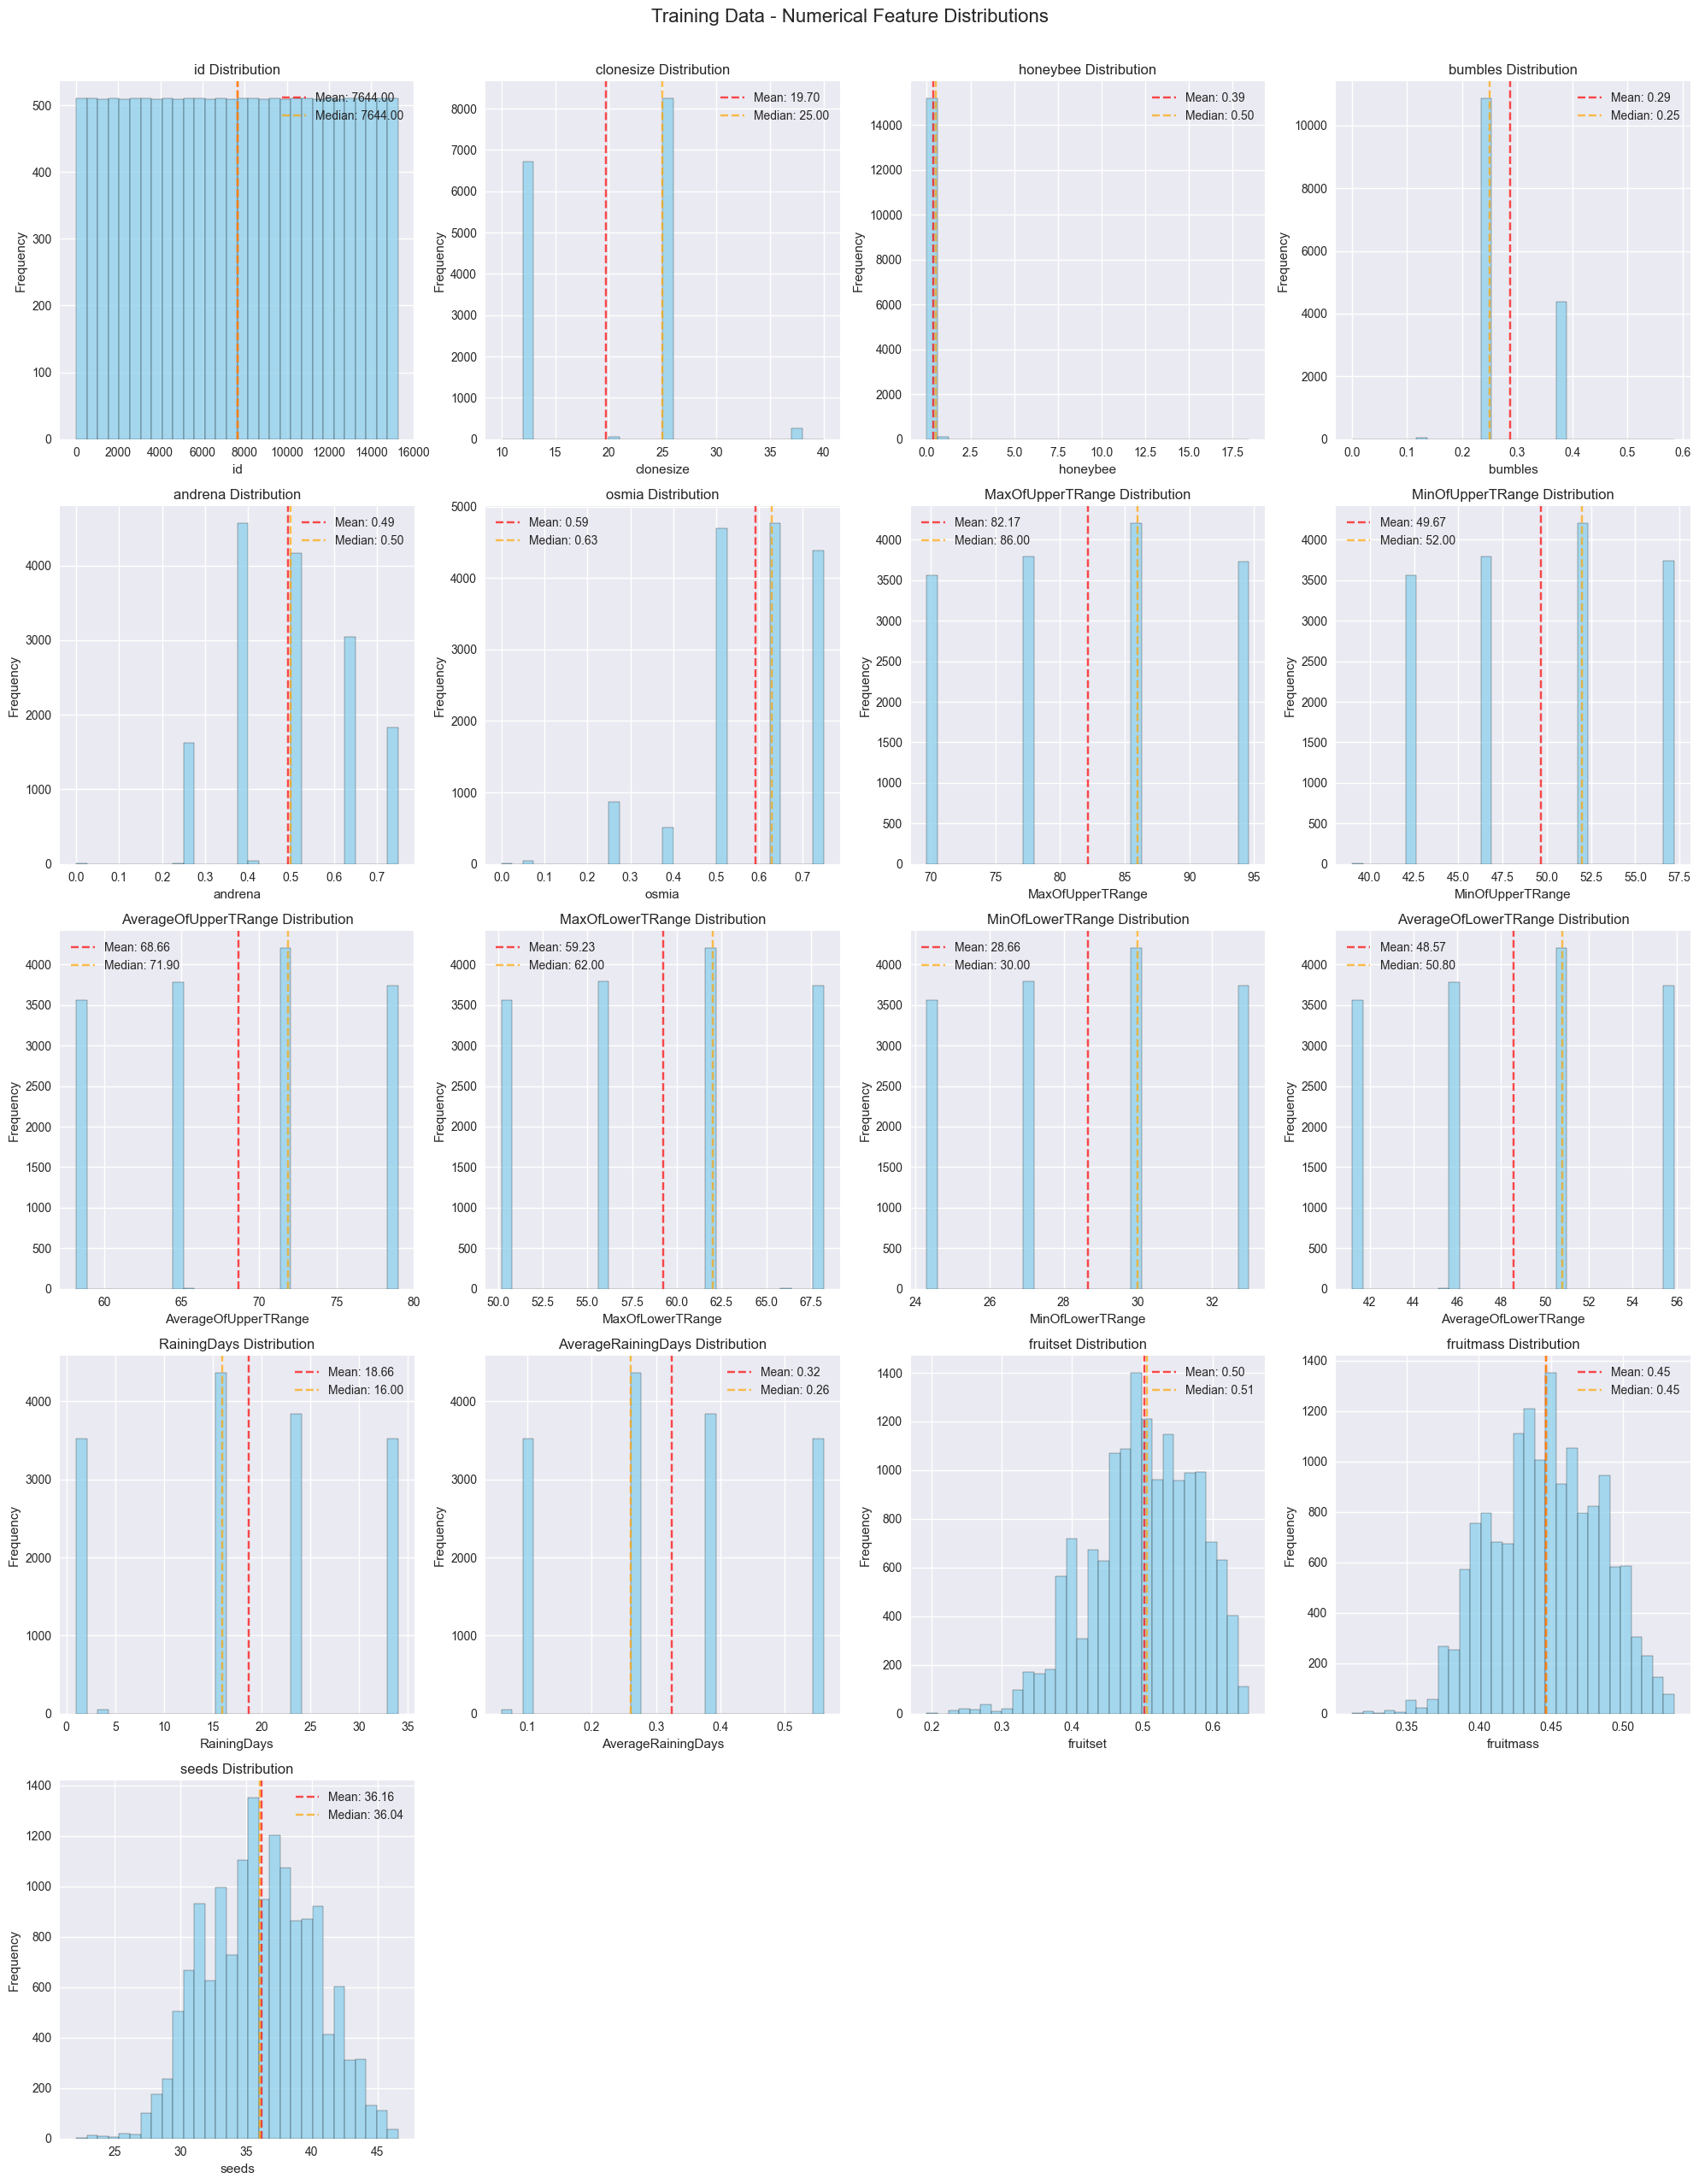

In [80]:
# Plot numerical features distributions
if train_numerical_cols:
    #determine number of rows and columns for subplots
    no_features = len(train_numerical_cols)
    #determine number of columns for subplots
    no_cols = 4
    #no_cols represents number of columns in the subplot grid while no_features represents total number of numerical features
    #determine number of rows for subplots
    no_rows = (no_features + no_cols - 1) // no_cols
    #this calculation ensures that if there are leftover features that don't fill a complete row, an additional row is still created to accommodate them.
    
    fig, axes = plt.subplots(no_rows, no_cols, figsize=(20, 5*no_rows))
    # plt.subplots helps to create a grid of subplots that work well for visualizing multiple features at once.
   
    if no_rows == 1:
        #i.e., only one row of subplots
        axes = [axes] if no_cols == 1 else axes
        #this handles the case where there's only one row or one column of subplots
        #that way axes is always a list because it simplifies indexing later
    else:
        axes = axes.flatten()
        # Flatten the 2D array of axes to 1D for easier indexing
    
    for i, col in enumerate(train_numerical_cols):
        if i < len(axes):
            
            # Histogram
            #histogram shows the distribution of a numerical variable
            #by dividing the data into bins and counting how many values fall into each bin.
            train[col].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue', edgecolor='black')
            # Add titles and labels
            axes[i].set_title(f'{col} Distribution')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
            
            # Add statistics
            mean_val = train[col].mean()
            median_val = train[col].median()
            # Add vertical lines for mean and median
            axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
            #Adds a vertical dashed line at the mean value of the feature
            #with a label showing the mean value rounded to two decimal places.
            axes[i].axvline(median_val, color='orange', linestyle='--', alpha=0.7, label=f'Median: {median_val:.2f}')
            #Adds a vertical dashed line at the median value of the feature
            #with a label showing the median value rounded to two decimal places.
            axes[i].legend()
            #legend to show mean and median labels
    
    # Hide empty subplots
    for i in range(no_features, len(axes)):
        axes[i].set_visible(False)
    #the for loop iterates over any remaining subplot axes that do not correspond to a numerical feature
    #and sets them to be invisible so that the final figure looks clean and only displays relevant
    
    plt.tight_layout()
    #tight_layout adjusts subplot params so that subplots fit into the figure area.
    plt.suptitle('Training Data - Numerical Feature Distributions', y=1.02, fontsize=16)
    #plt.suptitle places a main title for the entire figure, positioned slightly above the top of the subplots.
    plt.show()
    

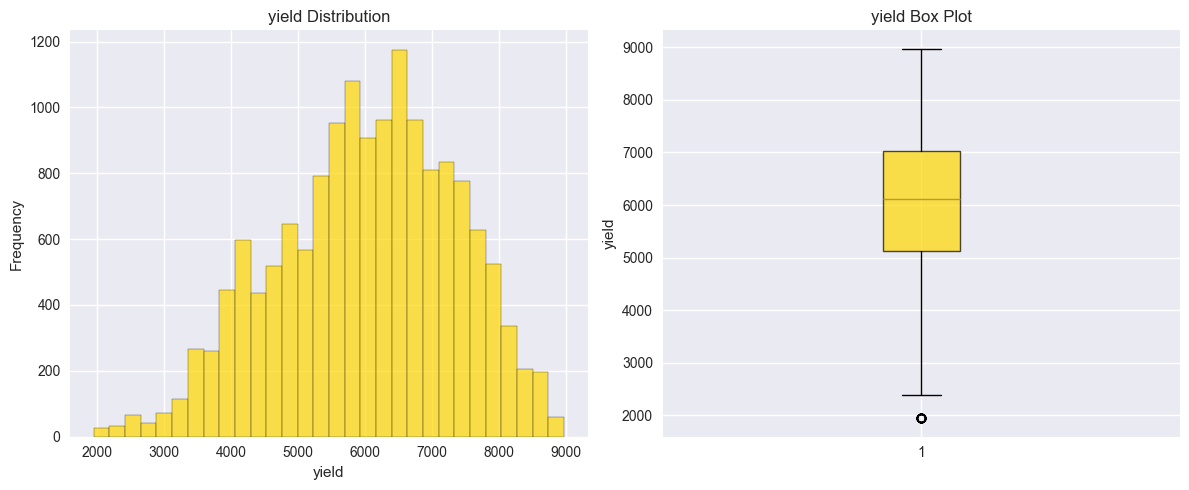

yield Statistics:
Mean: 6025.1940
Median: 6117.4759
Std: 1337.0568
Min: 1945.5306
Max: 8969.4018


In [81]:
# Plot categorical features distributions
if train_categorical_cols:
    no_features = len(train_categorical_cols)
    no_cols = 3
    n_rows = (no_features + no_cols - 1) // no_cols
    
    fig, axes = plt.subplots(no_rows, no_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if no_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(train_categorical_cols):
        if i < len(axes):
            value_counts = train[col].value_counts()
            value_counts.plot(kind='bar', ax=axes[i], color='lightgreen')
            axes[i].set_title(f'{col} Distribution')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Count')
            axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for i in range(no_features, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('Training Data - Categorical Feature Distributions', y=1.02, fontsize=16)
    plt.show()

# Plot target distribution if available
if target_col in train.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Histogram
    train[target_col].hist(bins=30, ax=axes[0], alpha=0.7, color='gold', edgecolor='black')
    axes[0].set_title(f'{target_col} Distribution')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel('Frequency')
    
    # Box plot
    axes[1].boxplot(train[target_col].dropna(), patch_artist=True, 
                   boxprops=dict(facecolor='gold', alpha=0.7))
    axes[1].set_title(f'{target_col} Box Plot')
    axes[1].set_ylabel(target_col)
    
    plt.tight_layout()
    plt.show()
    
    print(f"{target_col} Statistics:")
    print(f"Mean: {train[target_col].mean():.4f}")
    print(f"Median: {train[target_col].median():.4f}")
    print(f"Std: {train[target_col].std():.4f}")
    print(f"Min: {train[target_col].min():.4f}")
    print(f"Max: {train[target_col].max():.4f}")

### OUTLIER DETECTION (IQR METHOD)

In [82]:
train_outlier_summary = {}
for col in train_numerical_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[col] < lower_bound) | (train[col] > upper_bound)][col]
    
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(train)) * 100
    
    train_outlier_summary[col] = {
        'count': outlier_count,
        'percentage': outlier_percentage
    }
    
    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers ({outlier_percentage:.2f}%)")

honeybee: 8 outliers (0.05%)
bumbles: 10 outliers (0.07%)
andrena: 8 outliers (0.05%)
osmia: 56 outliers (0.37%)
RainingDays: 3569 outliers (23.34%)
AverageRainingDays: 49 outliers (0.32%)
fruitset: 97 outliers (0.63%)
fruitmass: 23 outliers (0.15%)
seeds: 24 outliers (0.16%)


### HANDLING MISSING DATA - TRAINING

In [83]:
train_cleaned = train.copy()

# Handle numerical missing data
if len(train_missing_summary) > 0:
    train_num_missing = train_cleaned[train_numerical_cols].isnull().sum()
    train_num_missing = train_num_missing[train_num_missing > 0]
    
    if len(train_num_missing) > 0:
        print(f"Handling missing numerical data in: {list(train_num_missing.index)}")
        
        # Use median imputation for numerical features
        numerical_imputer = SimpleImputer(strategy='median')
        train_cleaned[train_numerical_cols] = numerical_imputer.fit_transform(train_cleaned[train_numerical_cols])

# Handle categorical missing data
if train_categorical_cols:
    train_cat_missing = train_cleaned[train_categorical_cols].isnull().sum()
    train_cat_missing = train_cat_missing[train_cat_missing > 0]
    
    if len(train_cat_missing) > 0:
        print(f"Handling missing categorical data in: {list(train_cat_missing.index)}")
        
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        train_cleaned[train_categorical_cols] = categorical_imputer.fit_transform(train_cleaned[train_categorical_cols])

print("Handling training missing data completed!")

Handling training missing data completed!


### HANDLING MISSING DATA - TEST

In [84]:
test_cleaned = test.copy()

# Get test numerical and categorical columns
test_numerical_cols = test_cleaned.select_dtypes(include=[np.number]).columns.tolist()
test_categorical_cols = test_cleaned.select_dtypes(include=['object', 'category']).columns.tolist()

# Handle numerical missing data in test
if len(test_missing_summary) > 0:
    test_num_missing = test_cleaned[test_numerical_cols].isnull().sum()
    test_num_missing = test_num_missing[test_num_missing > 0]
    
    if len(test_num_missing) > 0:
        print(f"Handling missing numerical data in: {list(test_num_missing.index)}")
        
        # Use the same imputer fitted on training data
        if 'numerical_imputer' in locals():
            test_cleaned[test_numerical_cols] = numerical_imputer.transform(test_cleaned[test_numerical_cols])
        else:
            # Create new imputer if not created before
            test_numerical_imputer = SimpleImputer(strategy='median')
            test_cleaned[test_numerical_cols] = test_numerical_imputer.fit_transform(test_cleaned[test_numerical_cols])

# Handle categorical missing data in test
if test_categorical_cols:
    test_cat_missing = test_cleaned[test_categorical_cols].isnull().sum()
    test_cat_missing = test_cat_missing[test_cat_missing > 0]
    
    if len(test_cat_missing) > 0:
        print(f"Handling missing categorical data in: {list(test_cat_missing.index)}")
        
        # Use the same imputer fitted on training data
        if 'categorical_imputer' in locals():
            test_cleaned[test_categorical_cols] = categorical_imputer.transform(test_cleaned[test_categorical_cols])
        else:
            # Create new imputer if not created before
            test_categorical_imputer = SimpleImputer(strategy='most_frequent')
            test_cleaned[test_categorical_cols] = test_categorical_imputer.fit_transform(test_cleaned[test_categorical_cols])

print("Handling Test missing data completed!")

Handling Test missing data completed!


### ENCODING CATEGORICAL FEATURES - TRAINING

In [85]:
train_encoded = train_cleaned.copy()
#create a copy of the cleaned training data to perform encoding on
label_encoders = {}
# Encode categorical features in training data
#label_encoders dictionary to store the fitted LabelEncoders for each categorical column

if train_categorical_cols:
    print(f"Categorical features to encode: {train_categorical_cols}")
    
    for col in train_categorical_cols:
        unique_values = train_encoded[col].nunique()
        print(f"{col}: {unique_values} unique values")
        
        if unique_values <= 10:
            # Use one-hot encoding for low cardinality
            print(f"  -> Using one-hot encoding for {col}")
            dummies = pd.get_dummies(train_encoded[col], prefix=col, drop_first=True)
            train_encoded = pd.concat([train_encoded.drop(col, axis=1), dummies], axis=1)
        else:
            # Use label encoding for high cardinality
            print(f"  -> Using label encoding for {col}")
            le = LabelEncoder()
            train_encoded[col] = le.fit_transform(train_encoded[col].astype(str))
            label_encoders[col] = le
    
    print("Training categorical encoding completed!")
else:
    print("No categorical features found in training data!")

No categorical features found in training data!


### ENCODING CATEGORICAL FEATURES - TEST

In [86]:
test_encoded = test_cleaned.copy()

if test_categorical_cols:
    print(f"Categorical features to encode: {test_categorical_cols}")    
    
    for col in test_categorical_cols:
        unique_values = test_encoded[col].nunique()
        #nunique() function counts the number of unique values in a column
        print(f"{col}: {unique_values} unique values")
        
        if unique_values <= 10:
            # Use one-hot encoding for low cardinality
            print(f"  -> Using one-hot encoding for {col}")
            dummies = pd.get_dummies(test_encoded[col], prefix=col, drop_first=True)
            test_encoded = pd.concat([test_encoded.drop(col, axis=1), dummies], axis=1)
        else:
            # Use label encoding for high cardinality
            print(f"  -> Using label encoding for {col}")
            if col in label_encoders:
                # Handle unseen categories
                test_encoded[col] = test_encoded[col].astype(str)
                mask = test_encoded[col].isin(label_encoders[col].classes_)
                test_encoded.loc[~mask, col] = 'Unknown'
                
                # Add 'Unknown' to encoder if needed
                if 'Unknown' not in label_encoders[col].classes_:
                    label_encoders[col].classes_ = np.append(label_encoders[col].classes_, 'Unknown')
                
                test_encoded[col] = label_encoders[col].transform(test_encoded[col])
            else:
                # Create new encoder if not available
                le_test = LabelEncoder()
                test_encoded[col] = le_test.fit_transform(test_encoded[col].astype(str))
    
    print("Test categorical encoding completed!")
else:
    print("No categorical features found in test data!")

No categorical features found in test data!


### ALIGNING TRAIN AND TEST DATASETS

In [87]:
# Get feature columns (excluding target col because test doesn't have target)
train_features = [col for col in train_encoded.columns if col != target_col]
test_features = test_encoded.columns.tolist()

# Find missing columns
missing_in_test = set(train_features) - set(test_features)
#columns present in train but missing in test
missing_in_train = set(test_features) - set(train_features)
#columns present in test but missing in train

if missing_in_test:
    print(f"Adding missing columns to test: {missing_in_test}")
    for col in missing_in_test:
        test_encoded[col] = 0  # Add with zeros
# Add missing columns with zeros to test dataset that are in train but not in test
#this ensures that the test dataset has the same features as the training dataset

if missing_in_train:
    print(f"Removing extra columns from test: {missing_in_train}")
    test_encoded = test_encoded.drop(columns=list(missing_in_train))
# Remove extra columns from test dataset that are not in training data

# Reorder test columns to match train (excluding target)
feature_order = [col for col in train_encoded.columns if col != target_col]
test_encoded = test_encoded[feature_order]

print("Dataset alignment completed!")
print(f"Training features: {len(train_features)}")
print(f"Test features: {len(test_encoded.columns)}")

Dataset alignment completed!
Training features: 17
Test features: 17


### TRAIN/VALIDATION SPLIT
Splitting before scaling to prevent data leakage

In [88]:
train_encoded.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [89]:
# Split features and target from encoded data
X_full = train_encoded.drop(target_col, axis=1)
#Drop the target column from the training data to create the feature set X_full
#X_full now contains only the features used for training the model

y_full = train_encoded[target_col]
#y_full contains the target variable 'yield' which we want to predict

# Create train/validation split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, shuffle=True
)
# Splits the data into training and validation sets, with 20% of the data used for validation.

print(f"Full training data: {X_full.shape[0]} samples")
print(f"Training split: {X_train_split.shape[0]} samples ({X_train_split.shape[0]/X_full.shape[0]*100:.1f}%)")
print(f"Validation split: {X_val_split.shape[0]} samples ({X_val_split.shape[0]/X_full.shape[0]*100:.1f}%)")
print(f"Test data: {test_encoded.shape[0]} samples")

Full training data: 15289 samples
Training split: 12231 samples (80.0%)
Validation split: 3058 samples (20.0%)
Test data: 10194 samples


### FEATURE SCALING

In [90]:
# Get numerical columns (excluding target)
final_numerical_cols = X_train_split.select_dtypes(include=[np.number]).columns.tolist()

if final_numerical_cols:
    print(f"Analyzing features for optimal scaling: {final_numerical_cols}")
    print("FEATURE ANALYSIS FOR SCALER SELECTION (TRAINING SPLIT ONLY)")
    
    # Analyze each feature using ONLY training split to determine best scaling method
    scaling_recommendations = {}
    
    for col in final_numerical_cols:
        feature_data = X_train_split[col]  # ONLY use training split for analysis
        
        # Calculate statistics
        mean_val = feature_data.mean()
        median_val = feature_data.median()
        std_val = feature_data.std()
        min_val = feature_data.min()
        max_val = feature_data.max()
        range_val = max_val - min_val
        
        # Calculate skewness
        skewness = feature_data.skew()
        
        # Calculate outlier percentage using IQR
        Q1 = feature_data.quantile(0.25)
        Q3 = feature_data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_percentage = ((feature_data < lower_bound) | (feature_data > upper_bound)).sum() / len(feature_data) * 100
        
        # Check if data is already in [0,1] range
        is_normalized = (min_val >= 0) and (max_val <= 1)
        
        # Check if data has extreme values
        has_extreme_outliers = outlier_percentage > 15
        
        # Decision logic for scaler selection
        if is_normalized:
            recommended_scaler = "None (already normalized)"
        elif has_extreme_outliers:
            recommended_scaler = "RobustScaler (many outliers)"
        elif abs(skewness) > 2:
            recommended_scaler = "RobustScaler (highly skewed)"
        elif range_val > 1000:
            recommended_scaler = "StandardScaler (large range)"
        elif min_val >= 0 and max_val < 100:
            recommended_scaler = "MinMaxScaler (bounded positive)"
        else:
            recommended_scaler = "StandardScaler (general case)"
        
        scaling_recommendations[col] = recommended_scaler
        
        print(f"\n {col}:")
        print(f"   Range: [{min_val:.3f}, {max_val:.3f}] (span: {range_val:.3f})")
        print(f"   Mean: {mean_val:.3f}, Median: {median_val:.3f}")
        print(f"   Std: {std_val:.3f}, Skewness: {skewness:.3f}")
        print(f"   Outliers: {outlier_percentage:.1f}%")
        print(f"   RECOMMENDED: {recommended_scaler}")
    
    # Summary of scaling decisions
    print("SCALING DECISION SUMMARY")
        
    scaler_counts = {}
    for col, scaler_type in scaling_recommendations.items():
        scaler_name = scaler_type.split()[0]  # Get first word as scaler name
        if scaler_name not in scaler_counts:
            scaler_counts[scaler_name] = []
        scaler_counts[scaler_name].append(col)
    
    for scaler_type, columns in scaler_counts.items():
        print(f"{scaler_type}: {columns}")
    
    # Apply the most common scaler or make intelligent choice
    # Priority: RobustScaler for outlier-heavy data, StandardScaler for general case
    if any('RobustScaler' in rec for rec in scaling_recommendations.values()):
        chosen_scaler = "RobustScaler"
        from sklearn.preprocessing import RobustScaler
        scaler = RobustScaler()
        print(f"\n CHOSEN SCALER: RobustScaler (due to outliers/skewness)")
    elif any('MinMaxScaler' in rec for rec in scaling_recommendations.values()):
        chosen_scaler = "MinMaxScaler"
        scaler = MinMaxScaler()
        print(f"\n CHOSEN SCALER: MinMaxScaler (bounded positive data)")
    else:
        chosen_scaler = "StandardScaler"
        scaler = StandardScaler()
        print(f"\n CHOSEN SCALER: StandardScaler (general purpose)")
    
    # Store original statistics for reference
    print(f"\nOriginal feature ranges (training split only):")
    for col in final_numerical_cols:
        min_orig = X_train_split[col].min()
        max_orig = X_train_split[col].max()
        print(f"  {col}: [{min_orig:.3f}, {max_orig:.3f}]")
    
    # FIT scaler on training split ONLY
    scaler.fit(X_train_split[final_numerical_cols])
    
    # TRANSFORM all datasets using the fitted scaler
    X_train_split[final_numerical_cols] = scaler.transform(X_train_split[final_numerical_cols])
    X_val_split[final_numerical_cols] = scaler.transform(X_val_split[final_numerical_cols])
    
    # Also create scaled versions for full training and test data
    X_train_scaled = X_full.copy()
    X_test_scaled = test_encoded.copy()
    
    X_train_scaled[final_numerical_cols] = scaler.transform(X_full[final_numerical_cols])
    X_test_scaled[final_numerical_cols] = scaler.transform(test_encoded[final_numerical_cols])
    
    # Show scaled ranges
    print(f"\nScaled feature ranges (training split):")
    for col in final_numerical_cols:
        min_scaled = X_train_split[col].min()
        max_scaled = X_train_split[col].max()
        print(f"  {col}: [{min_scaled:.3f}, {max_scaled:.3f}]")
    
    print(" Feature scaling completed!")
else:
    print("No numerical features to scale!")
    # If no scaling needed, just copy the data
    X_train_scaled = X_full.copy()
    X_test_scaled = test_encoded.copy()



Analyzing features for optimal scaling: ['id', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds']
FEATURE ANALYSIS FOR SCALER SELECTION (TRAINING SPLIT ONLY)

 id:
   Range: [1.000, 15286.000] (span: 15285.000)
   Mean: 7655.390, Median: 7641.000
   Std: 4421.961, Skewness: -0.001
   Outliers: 0.0%
   RECOMMENDED: StandardScaler (large range)

 clonesize:
   Range: [10.000, 40.000] (span: 30.000)
   Mean: 19.695, Median: 25.000
   Std: 6.563, Skewness: 0.028
   Outliers: 0.0%
   RECOMMENDED: MinMaxScaler (bounded positive)

 honeybee:
   Range: [0.000, 18.430] (span: 18.430)
   Mean: 0.389, Median: 0.500
   Std: 0.360, Skewness: 42.097
   Outliers: 0.0%
   RECOMMENDED: RobustScaler (highly skewed)

 bumbles:
   Range: [0.000, 0.585] (span: 0.585)
   Mean: 0.287, Median: 0.250
   Std: 0

In [ ]:
print(f"Final training shape: {train_final.shape}")
print(f"Final test shape: {test_final.shape}")
print(f"Target column: {target_col}")

# Check for any remaining missing values
train_final_missing = train_final.isnull().sum().sum()
test_final_missing = test_final.isnull().sum().sum()

print(f"Remaining missing values in training: {train_final_missing}")
print(f"Remaining missing values in test: {test_final_missing}")

# Preview final datasets
print(f"\nFinal Training Data Preview:")
print(train_final.head())

print(f"\nFinal Test Data Preview:")
print(test_final.head())


### LINEAR REGRESSION MODEL TRAINING

In [92]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import time

In [93]:
# Dictionary to store models and their performance
model_results = {}

In [97]:
print("Training Linear Regression...")
start_time = time.time()
#start_time records the current time to measure how long the training takes
#important for performance evaluation

lr_model = LinearRegression()
lr_model.fit(X_train_split, y_train_split)
#fit method trains the Linear Regression model using the training data (X_train_split and y_train_split)

# Predictions
lr_train_pred = lr_model.predict(X_train_split)
# Predicts target values for the training set using the trained model
lr_val_pred = lr_model.predict(X_val_split)
# Predicts target values for the validation set using the trained model
#validation set is used to evaluate model performance on unseen data

# Evaluation metrics
lr_train_mae = mean_absolute_error(y_train_split, lr_train_pred)
lr_val_mae = mean_absolute_error(y_val_split, lr_val_pred)
lr_train_rmse = np.sqrt(mean_squared_error(y_train_split, lr_train_pred))
lr_val_rmse = np.sqrt(mean_squared_error(y_val_split, lr_val_pred))
lr_train_r2 = r2_score(y_train_split, lr_train_pred)
lr_val_r2 = r2_score(y_val_split, lr_val_pred)

model_results['Linear Regression'] = {
    'Train MAE': lr_train_mae,
    'Val MAE': lr_val_mae,
    'Train RMSE': lr_train_rmse,
    'Val RMSE': lr_val_rmse,
    'Train R²': lr_train_r2,
    'Val R²': lr_val_r2,
    'Training Time': time.time() - start_time,
    'Model': lr_model
}

print(f"   Train MAE: {lr_train_mae:.4f} | Val MAE: {lr_val_mae:.4f}")
print(f"   Train R²: {lr_train_r2:.4f} | Val R²: {lr_val_r2:.4f}")


Training Linear Regression...
   Train MAE: 371.3675 | Val MAE: 370.4280
   Train R²: 0.8099 | Val R²: 0.8105
